In [1]:
# import dependencies
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.stats import norm

In [2]:
def gen_3d_fig(x_coords, y_coords, z_coords):
    fig = px.scatter_3d(x=x_coords, y=y_coords, z=z_coords)
    fig_range = [-40, 40]
    fig.update_layout(scene = dict(
        xaxis=dict(range=fig_range),
        yaxis=dict(range=fig_range),
        zaxis=dict(range=fig_range),
        aspectmode="cube"
        )
    )
    fig.update_traces(marker=dict(size=2, color="red", opacity=0.2))
    return fig

def gen_2d_scatter_fig(x_coords, y_coords, title):
    plt.style.use('dark_background')
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_coords, y_coords, 
                        marker='s',           # Square markers
                        c='white',            # White color
                        alpha=0.1,            # Low opacity
                        s=100)                # Marker size
    ax.set_facecolor('black')
    fig.patch.set_facecolor('black')
    ax.grid(True, alpha=0.1)
    ax.set_xlim(-40, 40)
    ax.set_ylim(-40, 40)
    ax.set_aspect('equal')
    plt.xlabel('nm')
    plt.ylabel('nm')
    plt.title(title)
    
    return fig

def gen_2d_dist_histogram_fig(x_coords, y_coords, title):
    plt.style.use('default')
    
    # Calculate distances
    distances = np.sqrt(x_coords**2 + y_coords**2)
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot histogram
    counts, bins, _ = ax.hist(distances, bins=20, density=False, alpha=0.7, label='Data')
    
    # Fit Gaussian distribution
    mu, std = norm.fit(distances)
    
    # Create x values for the fitted Gaussian curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    
    # Calculate the Gaussian PDF scaled to match the histogram
    p = norm.pdf(x, mu, std)
    scale = np.sum(counts) * (bins[1] - bins[0])  # Scale to match histogram
    ax.plot(x, p * scale, 'r-', linewidth=2, label='Gaussian Fit')
    
    # Add text box with Gaussian parameters
    textstr = f'μ = {mu:.2f} nm\nσ = {std:.2f} nm'
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, 
            verticalalignment='top', horizontalalignment='right',
            bbox=props)
    
    plt.xlabel('Distance from center (nm)')
    plt.ylabel('# of points')
    plt.title(title)
    plt.legend()
    
    return fig

def load_data(path):
    with open(path, "rb") as f:
        sr_microscopy_data = pickle.load(f)
        sr_microscopy_data = np.stack(sr_microscopy_data, axis = 0)
    return sr_microscopy_data

In [20]:
with open("sr_microscopy_data.pickle", "rb") as f:
    sr_microscopy_data = pickle.load(f)
    sr_microscopy_data = np.stack(sr_microscopy_data, axis = 0)

In [33]:
temp_data = sr_microscopy_data[:, (sr_microscopy_data[2,:] >= 4)]
fig = gen_3d_fig(temp_data[0, :], temp_data[1, :], temp_data[2, :])
fig.show()

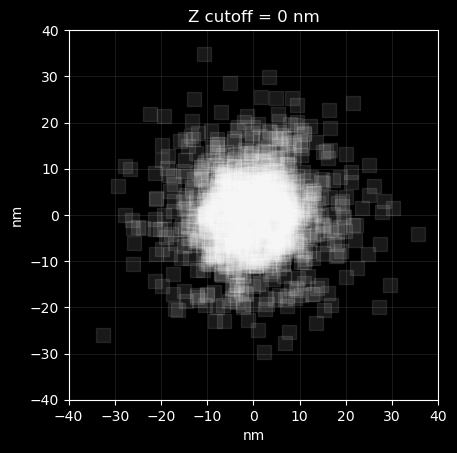

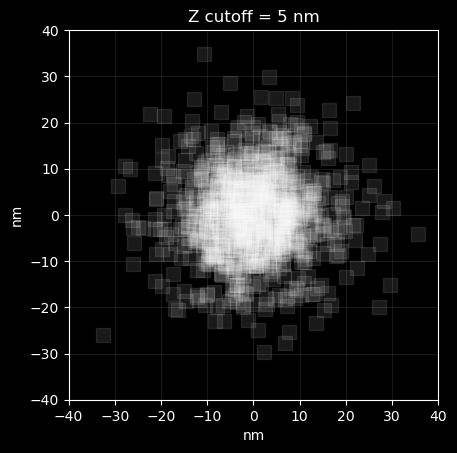

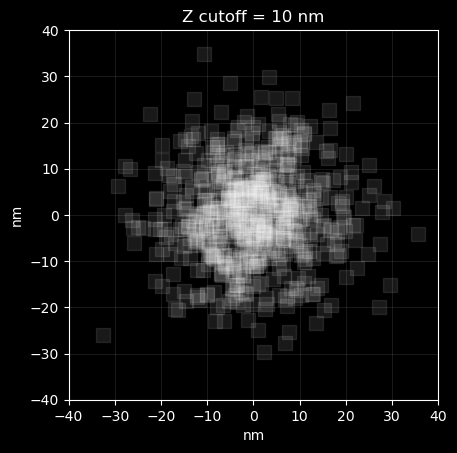

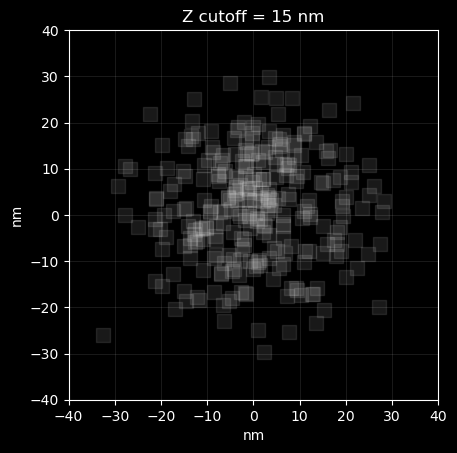

In [42]:
for i in range(0, 20, 5):
    temp_data = sr_microscopy_data[:, (sr_microscopy_data[2,:] >= i)]
    fig = gen_2d_scatter_fig(temp_data[0], temp_data[1], f"Z cutoff = {i} nm")
    fig.show()

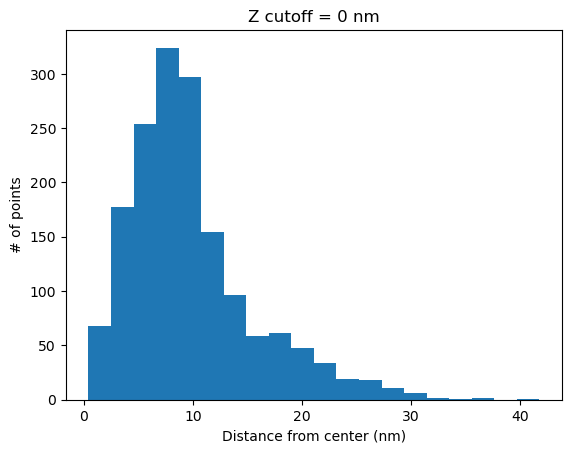

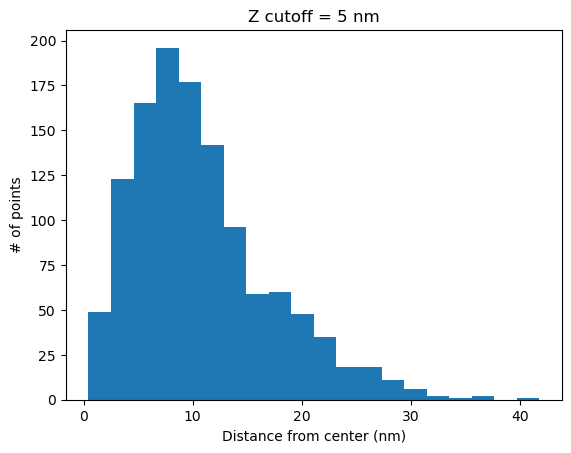

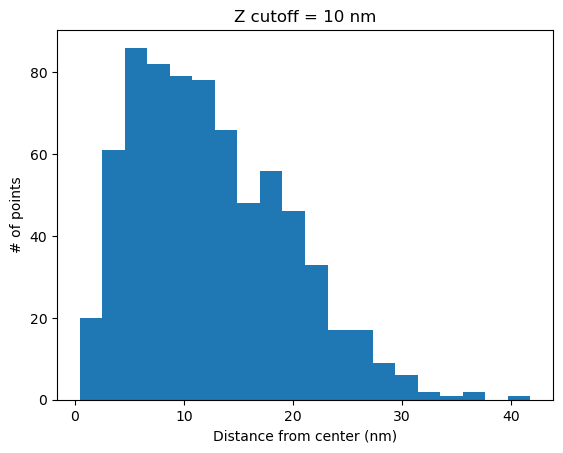

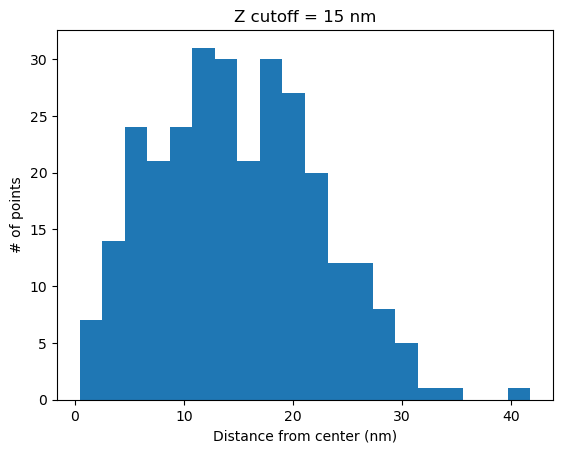

In [52]:
for i in range(0, 20, 5):
    temp_data = sr_microscopy_data[:, (sr_microscopy_data[2,:] >= i)]
    fig = gen_2d_dist_histogram_fig(temp_data[0], temp_data[1], f"Z cutoff = {i} nm")
    fig.show()

In [ ]:
radii = [185, 220, 255, 295]
combined_fig, axes = plt.subplots(len(radii), 1)
for r in radii:
    data = load_data(f"r{r}_sr.pickle")
    fig = gen_2d_scatter_fig(data[0], data[1], f"Outer Radius = {r/10} nm, Inner Radius = {(r-75)/10} nm")
    fig.show()
    

In [ ]:
for r in radii:
    data = load_data(f"r{r}_sr.pickle")
    fig = gen_2d_dist_histogram_fig(data[0], data[1], f"Outer Radius = {r/10} nm, Inner Radius = {(r-75)/10} nm")
    fig.show()

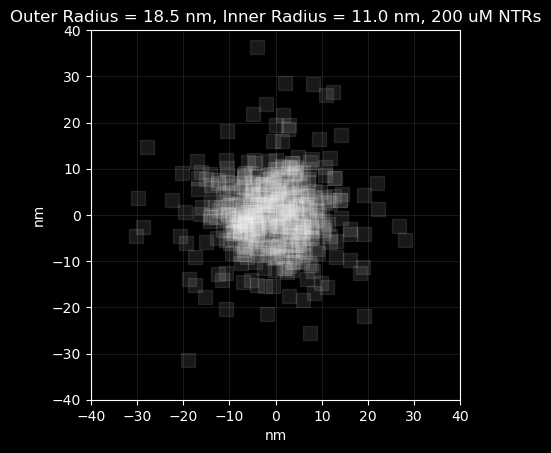

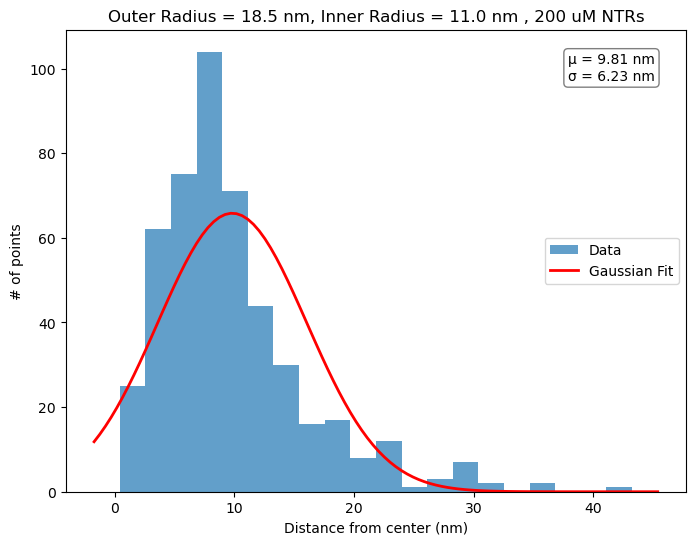

In [12]:
# With NTR

data = load_data(f"r185_ntr_sr.pickle")
fig = gen_2d_scatter_fig(data[0], data[1], f"Outer Radius = {185/10} nm, Inner Radius = {(185-75)/10} nm, 200 uM NTRs")
fig.show()
fig = gen_2d_dist_histogram_fig(data[0], data[1], f"Outer Radius = {185/10} nm, Inner Radius = {(185-75)/10} nm , 200 uM NTRs")
fig.show()

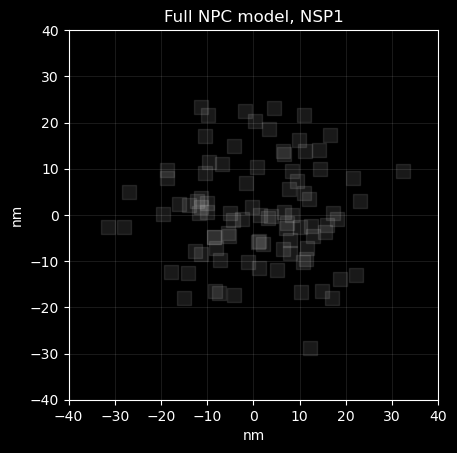

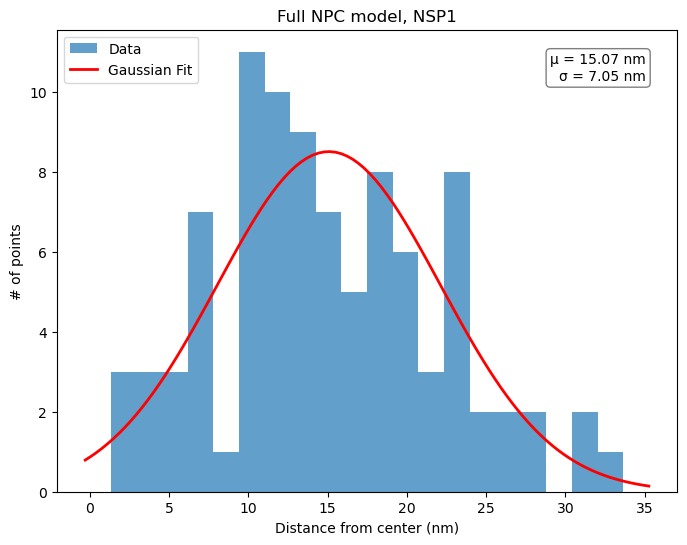

In [8]:
# Full model

data = load_data(f"full_sr.pickle")
fig = gen_2d_scatter_fig(data[0], data[1], f"Full NPC model, NSP1")
fig.show()
fig = gen_2d_dist_histogram_fig(data[0], data[1], f"Full NPC model, NSP1")
fig.show()